The strengths of hierarchical clustering methods include the following:

They often reveal the finer details about the relationships between data objects.
They provide an interpretable dendrogram.
The weaknesses of hierarchical clustering methods include the following:

They’re computationally expensive with respect to algorithm complexity.
They’re sensitive to noise and outliers.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The strengths of density-based clustering methods include the following:

They excel at identifying clusters of nonspherical shapes.
They’re resistant to outliers.
The weaknesses of density-based clustering methods include the following:

They aren’t well suited for clustering in high-dimensional spaces.
They have trouble identifying clusters of varying densities.

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Resources/allzipcodes_collision_weather_df.csv',dtype={'vehicle_type_code_1': 'str','vehicle_type_code_2': 'str','vehicle_type_code_3': 'str','vehicle_type_code_4': 'str',})

In [17]:
df.head()

,row_id,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,...,windspeed,visibility,severerisk,sunrise,sunset,icon,temperature_category,precip_category,humid_category,wind_level
0,10044_2022-03-26,2022-03-26 11:45:00,5,Other Hours,Queensboro Bridge Upper,1,0,0,0,0,...,14.2,9.9,10.0,06:49,19:14,rain,Moderate,Light,High,Leaves scatter
1,10465_2022-06-29,2022-06-29 06:55:00,2,Early Morning,Throgs Neck Bridge,0,0,0,0,0,...,14.6,9.8,30.0,05:27,20:31,rain,Warm,Light,High,Leaves scatter
2,11211_2022-06-29,2022-06-29 16:00:00,2,Rush Hours,Williamsburg Bridge Outer Roadwa,1,0,0,0,0,...,14.6,9.8,30.0,05:27,20:31,rain,Warm,Light,High,Leaves scatter
3,11225_2022-07-12,2022-07-12 17:50:00,1,Rush Hours,44 Empire Boulevard,0,0,0,0,0,...,14.5,9.9,60.0,05:35,20:27,cloudy,Warm,Dry,High,Leaves scatter
4,11225_2022-03-23,2022-03-23 10:00:00,2,Other Hours,71 East Drive,0,0,0,0,0,...,17.7,9.9,10.0,06:54,19:11,rain,Moderate,Light,Low,Leaves scatter


In [10]:
df.columns

Index(['row_id', 'crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Population Density',
       'Population', 'contributing_factor', 'number_of_deaths',
       'number_of_injuries', 'death_rate', 'injuries_rate',
       'severity_of_accident', 'month', 'year', 'day_of_week', 'hour', 'date',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'sunrise', 'sunset',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level'],
   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103782 entries, 0 to 103781
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   row_id                         103782 non-null  object 
 1   crash_datetime                 103782 non-null  object 
 2   crash_day_of_week              103782 non-null  int64  
 3   crash_hour_category            103782 non-null  object 
 4   street_address                 103780 non-null  object 
 5   number_of_persons_injured      103782 non-null  int64  
 6   number_of_persons_killed       103782 non-null  int64  
 7   number_of_pedestrians_injured  103782 non-null  int64  
 8   number_of_pedestrians_killed   103782 non-null  int64  
 9   number_of_cyclist_injured      103782 non-null  int64  
 10  number_of_cyclist_killed       103782 non-null  int64  
 11  number_of_motorist_injured     103782 non-null  int64  
 12  number_of_motorist_killed     

In [22]:
df.groupby('contributing_factor').size()

contributing_factor
Accelerator Defective                                       62
Aggressive Driving/Road Rage                               803
Alcohol Involvement                                       1788
Animals Action                                              85
Backing Unsafely                                          3198
Brakes Defective                                           447
Cell Phone (hand-Held)                                      44
Cell Phone (hands-free)                                      3
Driver Inattention/Distraction                           25825
Driver Inexperience                                       1877
Driverless/Runaway Vehicle                                 101
Drugs (illegal)                                             81
Eating or Drinking                                          10
Failure to Keep Right                                      111
Failure to Yield Right-of-Way                             7411
Fatigued/Drowsy                    

In [67]:
df1 = df[['crash_hour_category',
     'contributing_factor', 'number_of_deaths',
       'number_of_injuries',
       'severity_of_accident',
       'humidity', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level']]
df1.head()

,crash_hour_category,contributing_factor,number_of_deaths,number_of_injuries,severity_of_accident,humidity,preciptype,snow,windspeed,visibility,severerisk,icon,temperature_category,precip_category,humid_category,wind_level
0,Other Hours,Pavement Slippery,0,2,Serious (Low),53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter
1,Early Morning,Following Too Closely,0,0,Minor,57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter
2,Rush Hours,Driver Inattention/Distraction,0,2,Serious (Low),57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter
3,Rush Hours,Oversized Vehicle,0,0,Minor,66.8,0,0,14.5,9.9,60.0,cloudy,Warm,Dry,High,Leaves scatter
4,Other Hours,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,Minor,46.7,1,0,17.7,9.9,10.0,rain,Moderate,Light,Low,Leaves scatter


In [68]:
#ordinal encoding for 'precip_category'
precip_mapping = {
    'Dry': 1,        # Assuming 'Dry' as the baseline (lowest)
    'Light': 2,      # More intense than 'Dry'
    'Moderate': 3,   # More intense than 'Light'
    'Heavy': 4       # The most intense category
}

df1['precip_category_encoded'] = df1['precip_category'].map(precip_mapping)

#ordinal encoding for 'crash_hour_category'
crash_hour_category_mapping = {
    'Early Morning': 1,
    'Late Night': 2,
    'Other Hours': 3,
    'Rush Hours': 4
}

# Apply the mapping to the 'crash_hour_category' column
df1['crash_hour_category_encoded'] = df1['crash_hour_category'].map(crash_hour_category_mapping)


<ipython-input-68-a97bde5a333f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['precip_category_encoded'] = df1['precip_category'].map(precip_mapping)
<ipython-input-68-a97bde5a333f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['crash_hour_category_encoded'] = df1['crash_hour_category'].map(crash_hour_category_mapping)


In [69]:
df1.head()

,crash_hour_category,contributing_factor,number_of_deaths,number_of_injuries,severity_of_accident,humidity,preciptype,snow,windspeed,visibility,severerisk,icon,temperature_category,precip_category,humid_category,wind_level,precip_category_encoded,crash_hour_category_encoded
0,Other Hours,Pavement Slippery,0,2,Serious (Low),53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,2,3
1,Early Morning,Following Too Closely,0,0,Minor,57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,2,1
2,Rush Hours,Driver Inattention/Distraction,0,2,Serious (Low),57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,2,4
3,Rush Hours,Oversized Vehicle,0,0,Minor,66.8,0,0,14.5,9.9,60.0,cloudy,Warm,Dry,High,Leaves scatter,1,4
4,Other Hours,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,Minor,46.7,1,0,17.7,9.9,10.0,rain,Moderate,Light,Low,Leaves scatter,2,3


In [70]:
df1.columns

Index(['crash_hour_category', 'contributing_factor', 'number_of_deaths',
       'number_of_injuries', 'severity_of_accident', 'humidity', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'icon',
       'temperature_category', 'precip_category', 'humid_category',
       'wind_level', 'precip_category_encoded', 'crash_hour_category_encoded'],
      dtype='object')

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['precip_category_encoded','crash_hour_category_encoded']

# Fit and transform the scaler on the selected columns
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

# # Display the scaled DataFrame
# df.head()
# # Fit and transform the scaler on your data
# scaled_features = scaler.fit_transform(df1[['precip_category_encoded','crash_hour_category_encoded']])
# df1['precip_category_encoded'] = scaled_features

<ipython-input-74-ac14912356a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])


In [75]:
df1.head()

,crash_hour_category,contributing_factor,number_of_deaths,number_of_injuries,severity_of_accident,humidity,preciptype,snow,windspeed,visibility,severerisk,icon,temperature_category,precip_category,humid_category,wind_level,precip_category_encoded,crash_hour_category_encoded
0,Other Hours,Pavement Slippery,0,2,Serious (Low),53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-0.050361
1,Early Morning,Following Too Closely,0,0,Minor,57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,0.216152,-2.256125
2,Rush Hours,Driver Inattention/Distraction,0,2,Serious (Low),57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,0.216152,1.052521
3,Rush Hours,Oversized Vehicle,0,0,Minor,66.8,0,0,14.5,9.9,60.0,cloudy,Warm,Dry,High,Leaves scatter,-0.800188,1.052521
4,Other Hours,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,Minor,46.7,1,0,17.7,9.9,10.0,rain,Moderate,Light,Low,Leaves scatter,0.216152,-0.050361


In [62]:
from sklearn.preprocessing import OneHotEncoder

# crush_hour_category - one hot encoding
one_hot_encoder = OneHotEncoder()
encoded_crash_hour = one_hot_encoder.fit_transform(df[['crash_hour_category']])

encoded_crash_hour_df = pd.DataFrame(encoded_crash_hour.toarray(), 
                                     columns=one_hot_encoder.get_feature_names_out(['crash_hour_category']))
df1 = pd.concat([df1, encoded_crash_hour_df], axis=1)
df1.head()

,crash_hour_category,contributing_factor,number_of_deaths,number_of_injuries,severity_of_accident,humidity,preciptype,snow,windspeed,visibility,...,icon,temperature_category,precip_category,humid_category,wind_level,precip_category_encoded,crash_hour_category_Early Morning,crash_hour_category_Late Night,crash_hour_category_Other Hours,crash_hour_category_Rush Hours
0,Other Hours,Pavement Slippery,0,2,Serious (Low),53.5,1,0,14.2,9.9,...,rain,Moderate,Light,High,Leaves scatter,0.216152,0.0,0.0,1.0,0.0
1,Early Morning,Following Too Closely,0,0,Minor,57.2,1,0,14.6,9.8,...,rain,Warm,Light,High,Leaves scatter,0.216152,1.0,0.0,0.0,0.0
2,Rush Hours,Driver Inattention/Distraction,0,2,Serious (Low),57.2,1,0,14.6,9.8,...,rain,Warm,Light,High,Leaves scatter,0.216152,0.0,0.0,0.0,1.0
3,Rush Hours,Oversized Vehicle,0,0,Minor,66.8,0,0,14.5,9.9,...,cloudy,Warm,Dry,High,Leaves scatter,-0.800188,0.0,0.0,0.0,1.0
4,Other Hours,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,Minor,46.7,1,0,17.7,9.9,...,rain,Moderate,Light,Low,Leaves scatter,0.216152,0.0,0.0,1.0,0.0


In [90]:
cluster_features = ['precip_category_encoded','crash_hour_category_encoded']

# Extract features for clustering
X = df1[cluster_features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model
kmeans.fit(X)

# Predict the cluster for each instance in the DataFrame
df1.loc[:, 'cluster'] = kmeans.predict(X)

# Check the resulting clusters
print(df1['cluster'].value_counts())


cluster
3    32632
0    30577
1    21547
2    19026
Name: count, dtype: int64


In [91]:
df1.head()

,crash_hour_category,contributing_factor,number_of_deaths,number_of_injuries,severity_of_accident,humidity,preciptype,snow,windspeed,visibility,severerisk,icon,temperature_category,precip_category,humid_category,wind_level,precip_category_encoded,crash_hour_category_encoded,cluster
0,Other Hours,Pavement Slippery,0,2,Serious (Low),53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-0.050361,3
1,Early Morning,Following Too Closely,0,0,Minor,57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,0.216152,-2.256125,1
2,Rush Hours,Driver Inattention/Distraction,0,2,Serious (Low),57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,0.216152,1.052521,0
3,Rush Hours,Oversized Vehicle,0,0,Minor,66.8,0,0,14.5,9.9,60.0,cloudy,Warm,Dry,High,Leaves scatter,-0.800188,1.052521,0
4,Other Hours,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,Minor,46.7,1,0,17.7,9.9,10.0,rain,Moderate,Light,Low,Leaves scatter,0.216152,-0.050361,3


In [92]:
df1.head(100)

,crash_hour_category,contributing_factor,number_of_deaths,number_of_injuries,severity_of_accident,humidity,preciptype,snow,windspeed,visibility,severerisk,icon,temperature_category,precip_category,humid_category,wind_level,precip_category_encoded,crash_hour_category_encoded,cluster
0,Other Hours,Pavement Slippery,0,2,Serious (Low),53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-0.050361,3
1,Early Morning,Following Too Closely,0,0,Minor,57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,0.216152,-2.256125,1
2,Rush Hours,Driver Inattention/Distraction,0,2,Serious (Low),57.2,1,0,14.6,9.8,30.0,rain,Warm,Light,High,Leaves scatter,0.216152,1.052521,0
3,Rush Hours,Oversized Vehicle,0,0,Minor,66.8,0,0,14.5,9.9,60.0,cloudy,Warm,Dry,High,Leaves scatter,-0.800188,1.052521,0
4,Other Hours,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,Minor,46.7,1,0,17.7,9.9,10.0,rain,Moderate,Light,Low,Leaves scatter,0.216152,-0.050361,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Late Night,Reaction to Uninvolved Vehicle,0,2,Serious (Low),53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-1.153243,1
96,Other Hours,Backing Unsafely,0,2,Serious (Low),61.9,1,0,14.6,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-0.050361,3
97,Other Hours,Passing or Lane Usage Improper,0,0,Minor,53.5,1,0,14.2,9.9,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-0.050361,3
98,Early Morning,Following Too Closely,0,0,Minor,69.9,1,0,17.8,9.4,10.0,rain,Moderate,Light,High,Leaves scatter,0.216152,-2.256125,1


In [118]:
df1.groupby('precip_category_encoded').size()

precip_category_encoded
-0.800188    52700
 0.216152    31373
 1.232491     8790
 2.248831    10919
dtype: int64

In [119]:
import hvplot.pandas
scatter_plot = df1.hvplot.scatter(x='crash_hour_category_encoded', y='precip_category_encoded', by='cluster')  

# Display the scatter plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [crash_hour_category_encoded]   (precip_category_encoded)

In [100]:
df1[['precip_category_encoded']]

,precip_category_encoded
0,0.216152
1,0.216152
2,0.216152
3,-0.800188
4,0.216152
...,...
103777,-0.800188
103778,1.232491
103779,1.232491
103780,0.216152


In [95]:
from bokeh.sampledata.iris import flowers as df2

df2.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
16,5.4,3.9,1.3,0.4,setosa
77,6.7,3.0,5.0,1.7,versicolor
54,6.5,2.8,4.6,1.5,versicolor
125,7.2,3.2,6.0,1.8,virginica
99,5.7,2.8,4.1,1.3,versicolor


In [115]:
#df2.info()

In [114]:
#df1.info()

In [99]:
df2[['sepal_length']]

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [98]:
df.hvplot.scatter(x='sepal_length', y='sepal_width', by='species', 
                  legend='top', height=400, width=400)

:NdOverlay   [species]
   :Scatter   [sepal_length]   (sepal_width)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on your data
scaled_features = scaler.fit_transform(df1)

# Choose the number of clusters
k = 5 

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_features)

# Get the cluster labels
labels = kmeans.labels_

# You can add these labels back to your original DataFrame if needed
df1['cluster'] = labels


In [78]:
weather_df = weather_df[['datetime','temp','humidity','precipcover','snowdepth','windspeed','visibility']]

In [79]:
weather_df.head(100)

,datetime,temp,humidity,precipcover,snowdepth,windspeed,visibility
0,2022-01-01,52.8,91.6,54.17,0.0,8.1,5.4
1,2022-01-02,50.3,83.8,12.50,0.0,14.2,7.3
2,2022-01-03,30.1,49.9,0.00,0.0,16.2,9.9
3,2022-01-04,27.2,49.1,0.00,0.0,12.4,9.9
4,2022-01-05,39.5,77.0,33.33,0.0,12.8,8.4
...,...,...,...,...,...,...,...
95,2022-04-06,47.8,88.5,54.17,0.0,20.5,8.4
96,2022-04-07,48.9,88.4,45.83,0.0,20.9,7.5
97,2022-04-08,55.4,62.1,12.50,0.0,13.7,9.0
98,2022-04-09,50.9,65.2,25.00,0.0,17.0,9.8


In [80]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     365 non-null    datetime64[ns]
 1   temp         365 non-null    float64       
 2   humidity     365 non-null    float64       
 3   precipcover  365 non-null    float64       
 4   snowdepth    365 non-null    float64       
 5   windspeed    365 non-null    float64       
 6   visibility   365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


In [135]:
#merge collision df with (cleaned) weather df
collision_df = pd.read_csv('../Resources/collision_2022.csv')

weather_df['datetime'] = pd.to_datetime(weather_df['datetime']).dt.date

collision_df['crash_datetime'] = pd.to_datetime(collision_df['crash_datetime'])
collision_df['crash_date'] = collision_df['crash_datetime'].dt.date

collision_weather_df = pd.merge(collision_df,weather_df,left_on='crash_date', right_on='datetime')

collision_weather_df.drop('datetime', axis=1, inplace=True)

crash_datetime_col = collision_weather_df['crash_datetime']
collision_weather_df.drop('crash_datetime', axis=1, inplace=True)
collision_weather_df.insert(0, 'crash_datetime', crash_datetime_col)

collision_weather_df.set_index('collision_id', inplace=True)
collision_weather_df.drop('crash_date', axis=1, inplace=True)

In [136]:
collision_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103856 entries, 4513547 to 4647650
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_datetime                 103856 non-null  datetime64[ns]
 1   crash_day_of_week              103856 non-null  int64         
 2   street_address                 103854 non-null  object        
 3   number_of_persons_injured      103856 non-null  int64         
 4   number_of_persons_killed       103856 non-null  int64         
 5   number_of_pedestrians_injured  103856 non-null  int64         
 6   number_of_pedestrians_killed   103856 non-null  int64         
 7   number_of_cyclist_injured      103856 non-null  int64         
 8   number_of_cyclist_killed       103856 non-null  int64         
 9   number_of_motorist_injured     103856 non-null  int64         
 10  number_of_motorist_killed      103856 non-null  int64         
 11

In [137]:
collision_weather_df = collision_weather_df[['crash_datetime','number_of_persons_injured','number_of_persons_killed','number_of_pedestrians_injured','number_of_pedestrians_killed','number_of_cyclist_injured','number_of_cyclist_killed','number_of_motorist_injured','number_of_motorist_killed','temp','humidity','precipcover','snowdepth','windspeed','visibility']]

In [138]:
collision_weather_df.head()

,crash_datetime,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,temp,humidity,precipcover,snowdepth,windspeed,visibility
collision_id,,,,,,,,,,,,,,,
4513547,2022-03-26 11:45:00,1,0,0,0,0,0,1,0,49.3,53.5,4.17,0.0,14.2,9.9
4513697,2022-03-26 14:00:00,0,0,0,0,0,0,0,0,49.3,53.5,4.17,0.0,14.2,9.9
4513935,2022-03-26 01:02:00,1,0,0,0,0,0,1,0,49.3,53.5,4.17,0.0,14.2,9.9
4513794,2022-03-26 16:02:00,1,0,0,0,0,0,1,0,49.3,53.5,4.17,0.0,14.2,9.9
4514267,2022-03-26 16:05:00,1,0,0,0,0,0,1,0,49.3,53.5,4.17,0.0,14.2,9.9


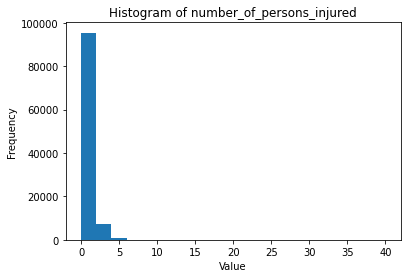

In [139]:
## k mean clustering assumes features are normaly distributed
import matplotlib.pyplot as plt

plt.hist(collision_weather_df['number_of_persons_injured'], bins=20)
plt.title('Histogram of number_of_persons_injured')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [140]:
collision_weather_df.groupby('number_of_persons_injured').size()

number_of_persons_injured
0     64727
1     30748
2      5682
3      1691
4       644
5       215
6        78
7        40
8        12
9         2
10        6
11        2
12        1
13        3
14        1
15        3
40        1
dtype: int64

In [141]:
# Check for NaN values after the log transformation
collision_weather_df['number_of_persons_injured_log'] = np.log1p(collision_weather_df['number_of_persons_injured'])
if collision_weather_df['number_of_persons_injured_log'].isnull().any():
    # Handle NaN values if they exist
    # For example, replace NaNs with the mean of the column
    mean_value = collision_weather_df['number_of_persons_injured_log'].mean()
    collision_weather_df['number_of_persons_injured_log'].fillna(mean_value, inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the logarithmically transformed data
collision_weather_df['number_of_persons_injured_scaled'] = scaler.fit_transform(collision_weather_df[['number_of_persons_injured_log']].values.reshape(-1, 1))


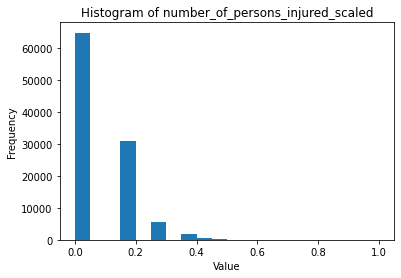

In [142]:
## k mean clustering assumes features are normaly distributed
import matplotlib.pyplot as plt

plt.hist(collision_weather_df['number_of_persons_injured_scaled'], bins=20)
plt.title('Histogram of number_of_persons_injured_scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

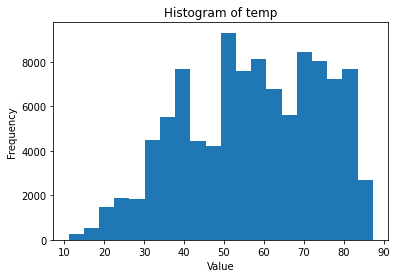

In [143]:
plt.hist(collision_weather_df['temp'], bins=20)
plt.title('Histogram of temp')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

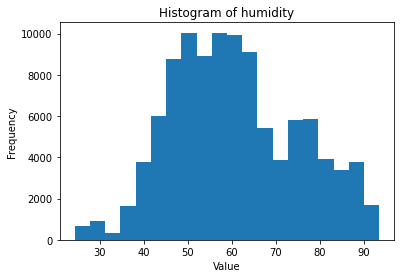

In [144]:
plt.hist(collision_weather_df['humidity'], bins=20)
plt.title('Histogram of humidity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

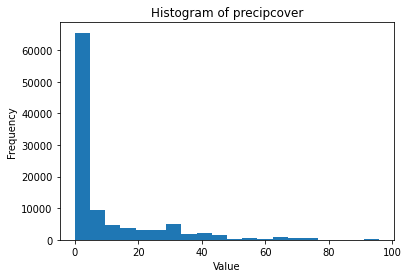

In [145]:
plt.hist(collision_weather_df['precipcover'], bins=20)
plt.title('Histogram of precipcover')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [146]:
# Assuming df is your DataFrame and 'precipcover' is the column of interest
# Adding a small constant to avoid taking the log of zero
collision_weather_df['precipcover_log'] = np.log(collision_weather_df['precipcover'] + 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the logarithmically transformed data
collision_weather_df['precipcover_scaled'] = scaler.fit_transform(collision_weather_df[['precipcover_log']])

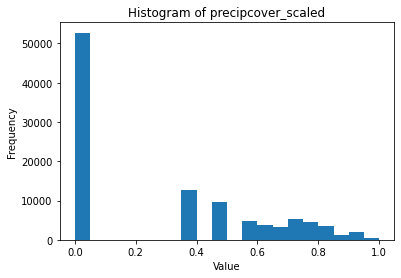

In [147]:
plt.hist(collision_weather_df['precipcover_scaled'], bins=20)
plt.title('Histogram of precipcover_scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

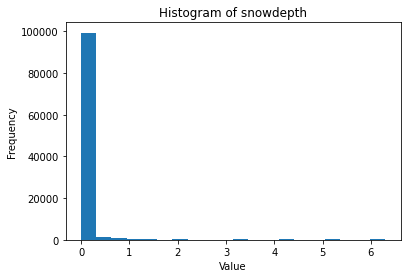

In [148]:
plt.hist(collision_weather_df['snowdepth'], bins=20)
plt.title('Histogram of snowdepth')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [149]:
# Create a binary feature for classification
collision_weather_df['has_snow'] = (collision_weather_df['snowdepth'] > 0).astype(int)

# Transform and scale non-zero values
# Extract non-zero values for transformation
snowdepth_nonzero = collision_weather_df.loc[collision_weather_df['has_snow'] == 1, 'snowdepth']

# Add a small constant to avoid log of zero
snowdepth_nonzero += 1e-6

# Apply a logarithmic transformation
transformed_snowdepth = np.log(snowdepth_nonzero)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the transformed data and replace in the original DataFrame
collision_weather_df.loc[collision_weather_df['has_snow'] == 1, 'snowdepth_scaled'] = scaler.fit_transform(transformed_snowdepth.values.reshape(-1, 1))

# Fill the scaled values for zero snow depth entries with 0 (or another placeholder value of your choice)
collision_weather_df['snowdepth_scaled'] = collision_weather_df['snowdepth_scaled'].fillna(0)


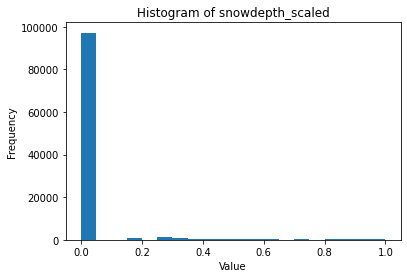

In [150]:
plt.hist(collision_weather_df['snowdepth_scaled'], bins=20)
plt.title('Histogram of snowdepth_scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

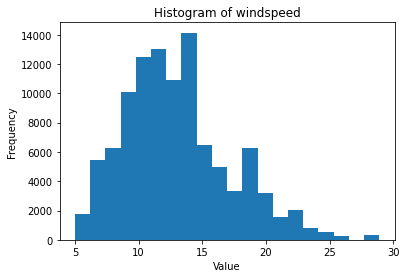

In [151]:
plt.hist(collision_weather_df['windspeed'], bins=20)
plt.title('Histogram of windspeed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

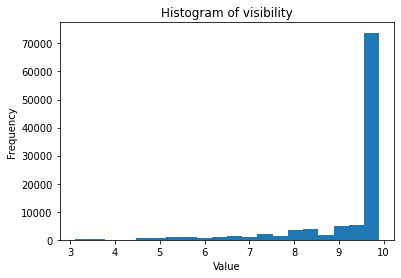

In [152]:
plt.hist(collision_weather_df['visibility'], bins=20)
plt.title('Histogram of visibility')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [153]:
# Apply a square root transformation to reduce left skewness
collision_weather_df['visibility_transformed'] = np.sqrt(collision_weather_df['visibility'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the transformed data
collision_weather_df['visibility_scaled'] = scaler.fit_transform(collision_weather_df[['visibility_transformed']].values.reshape(-1, 1))

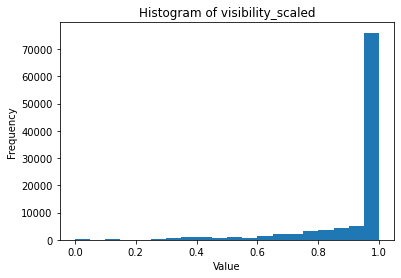

In [154]:
plt.hist(collision_weather_df['visibility_scaled'], bins=20)
plt.title('Histogram of visibility_scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [155]:
collision_weather_df.columns

Index(['crash_datetime', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'temp', 'humidity', 'precipcover',
       'snowdepth', 'windspeed', 'visibility', 'number_of_persons_injured_log',
       'number_of_persons_injured_scaled', 'precipcover_log',
       'precipcover_scaled', 'has_snow', 'snowdepth_scaled',
       'visibility_transformed', 'visibility_scaled'],
      dtype='object')

In [162]:
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame

# Selecting the columns to be used in the clustering
# You may want to exclude certain columns that are not relevant for clustering
# For instance, you might exclude the 'has_snow' column if it was only used to handle snow depth

cluster_features = [
    'number_of_persons_injured_scaled', 
    #'number_of_persons_killed', 
    #'number_of_pedestrians_injured',
    #'number_of_pedestrians_killed', 
    #'number_of_cyclist_injured',
    #'number_of_cyclist_killed', 
    #'number_of_motorist_injured',
    #'number_of_motorist_killed',
    'temp', 
    'humidity', 
    'windspeed', 
    'precipcover_scaled', 
    'has_snow',
    'snowdepth_scaled', 
    'visibility_scaled'
]

# Extract features for clustering
X = collision_weather_df[cluster_features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model
kmeans.fit(X)

# Predict the cluster for each instance in the DataFrame
collision_weather_df.loc[:, 'cluster'] = kmeans.predict(X)

# Check the resulting clusters
print(collision_weather_df['cluster'].value_counts())


cluster
1    33058
2    25523
0    25252
3    20023
Name: count, dtype: int64


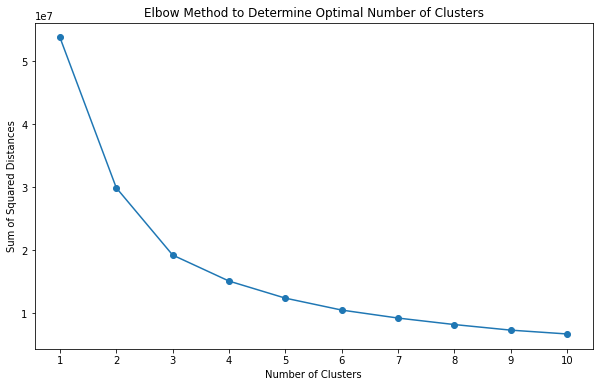

In [163]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X' is your features DataFrame

# Calculate SSD for a range of number of cluster
ssd = []
for num_clusters in range(1, 11):  # Let's test for 1 to 10 clusters, for instance
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot SSD for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(1, 11))
plt.show()


In [164]:
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame

# Selecting the columns to be used in the clustering
# You may want to exclude certain columns that are not relevant for clustering
# For instance, you might exclude the 'has_snow' column if it was only used to handle snow depth

cluster_features = [
    'number_of_persons_injured_scaled', 
    #'number_of_persons_killed', 
    #'number_of_pedestrians_injured',
    #'number_of_pedestrians_killed', 
    #'number_of_cyclist_injured',
    #'number_of_cyclist_killed', 
    #'number_of_motorist_injured',
    #'number_of_motorist_killed',
    'temp', 
    'humidity', 
    'windspeed', 
    'precipcover_scaled',
    'has_snow',
    'snowdepth_scaled', 
    'visibility_scaled'
]

# Extract features for clustering
X = collision_weather_df[cluster_features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model
kmeans.fit(X)

# Predict the cluster for each instance in the DataFrame
collision_weather_df.loc[:, 'cluster'] = kmeans.predict(X)

# Check the resulting clusters
print(collision_weather_df['cluster'].value_counts())



# Get centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids, columns=X.columns)

# Display the centroids to understand the mean value of each feature per cluster
print(centroids_df)


cluster
1    33058
2    25523
0    25252
3    20023
Name: count, dtype: int64
   number_of_persons_injured_scaled       temp   humidity  windspeed  \
0                          0.082464  54.970379  49.199612  13.181261   
1                          0.087661  76.134095  60.710739  11.745196   
2                          0.081874  54.882667  79.580523  13.434965   
3                          0.072311  32.568207  51.020791  13.933122   

   precipcover_scaled  has_snow  snowdepth_scaled  visibility_scaled  
0            0.158627  0.009385      2.060851e-15           0.992601  
1            0.257426  0.018815      2.590835e-03           0.972148  
2            0.608565  0.133135      2.988308e-02           0.767714  
3            0.108427  0.229037      1.201595e-01           0.958920  
